# Running the search

In [1]:
# run function in parallel with progress bar:

from multiprocessing import Pool
from functools import partial
from parameter_search import run
from tqdm.notebook import tqdm

# maximum load of the heat pump system in watt
max_load_absolute = 9000

# which weeks to choose from the datasets. parameter optimization is done 
# one week at a time and then, the minimum peak reduction over of all weeks is taken
weeks = [0, 2, 4]

# how many times we sample the households onto number_of_households with the same parameters
repeat_cycles = 10

# how many households we sample the heat pump load onto
number_of_households = 4000

# how many variants are tested before they are saved to a pickle for evaluation
variants_per_run = 1

# number of all variants = variants_per_run * runs 
runs = 100
total_variants = variants_per_run * runs

parallel_processes = 4


if __name__ == '__main__':
    partial_run = partial(run, repeat_cycles, variants_per_run, number_of_households, max_load_absolute)
    with Pool(processes=8) as pool:
        args = [weeks] * total_variants
        results = list(tqdm(pool.imap_unordered(partial_run, args), total=total_variants))
        for result in results:
            pass

  0%|          | 0/100 [00:00<?, ?it/s]

Testing parameters: {'initial_share': 0.7785743119033262, 'initial_shift_ratio': 0.6050363357176504}
Testing parameters: {'initial_share': 0.13284532826559958, 'initial_shift_ratio': 0.4032842110676188}
Testing parameters: {'initial_share': 0.4189621809540397, 'initial_shift_ratio': 0.2565645989057599}
Testing parameters: {'initial_share': 0.8151712076564473, 'initial_shift_ratio': 0.16158550264974192}
Testing parameters: {'initial_share': 0.24828744311392326, 'initial_shift_ratio': 0.6694091550380199}
Testing parameters: {'initial_share': 0.1867654967373087, 'initial_shift_ratio': 0.43943365860214123}
Testing parameters: {'initial_share': 0.24221697691231714, 'initial_shift_ratio': 0.6560931162574545}
Testing parameters: {'initial_share': 0.907957140281843, 'initial_shift_ratio': 0.4502115509993395}
Testing parameters: {'initial_share': 0.5036082117814589, 'initial_shift_ratio': 0.7131042293896807}
Testing parameters: {'initial_share': 0.4308992548632149, 'initial_shift_ratio': 0.2203

Testing parameters: {'initial_share': 0.030650916156050312, 'initial_shift_ratio': 0.4588019154393784}
Testing parameters: {'initial_share': 0.6513653446846233, 'initial_shift_ratio': 0.5566708136279422}
Testing parameters: {'initial_share': 0.28183230322932207, 'initial_shift_ratio': 0.7715435233402806}
Testing parameters: {'initial_share': 0.014332612216794938, 'initial_shift_ratio': 0.6336856417119703}
Testing parameters: {'initial_share': 0.9678882362929818, 'initial_shift_ratio': 0.570896546024425}
Testing parameters: {'initial_share': 0.027824347241500624, 'initial_shift_ratio': 0.33551770191512464}
Testing parameters: {'initial_share': 0.78898688615371, 'initial_shift_ratio': 0.7809564915404448}
Testing parameters: {'initial_share': 0.7961870130808889, 'initial_shift_ratio': 0.2893262900693625}
Testing parameters: {'initial_share': 0.2647548108292632, 'initial_shift_ratio': 0.21981457738590415}
Testing parameters: {'initial_share': 0.8668934186083952, 'initial_shift_ratio': 0.04

# Evaluating the Results

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

### read and merge all results from disk

In [3]:
files = glob.glob("./results/*.pkl")

# find all pickles in the folder
dfs = []
for file in files:
    dfs.append(pd.read_pickle(file))

# concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

### make units and strings more readable

In [4]:
df = df.sort_values(ascending=False, by="OVERALL MIN")

df.loc[:, "initial_shift_ratio"] = df.loc[:, "initial_shift_ratio"] * ( max_load_absolute / 1000) # watt to kw
df.loc[:, "initial_share"] = df.loc[:, "initial_share"] * 100 # fraction to percentage
df.loc[:, "OVERALL MIN"] = df.loc[:, "OVERALL MIN"] / 1000 # watt to kw
df.loc[:, "OVERALL AVG"] = df.loc[:, "OVERALL AVG"] / 1000 # watt to kw

In [5]:
share = "Blocked Heat Pump Share in % (α)"
shift_ratio = "Maximum Allowed Load in KW (β)"
overall_min = "Overall Minimum Load Reduction (in kW)"
overall_avg = "Overall Average Load Reduction (in kW)"

df = df.rename(
    columns={
        "initial_shift_ratio": shift_ratio,
        "initial_share": share,
        "OVERALL MIN": overall_min,
        "OVERALL AVG": overall_avg,
    }
)

# Results

## Plot of all results

<AxesSubplot: xlabel='Maximum Allowed Load in KW (β)', ylabel='Blocked Heat Pump Share in % (α)'>

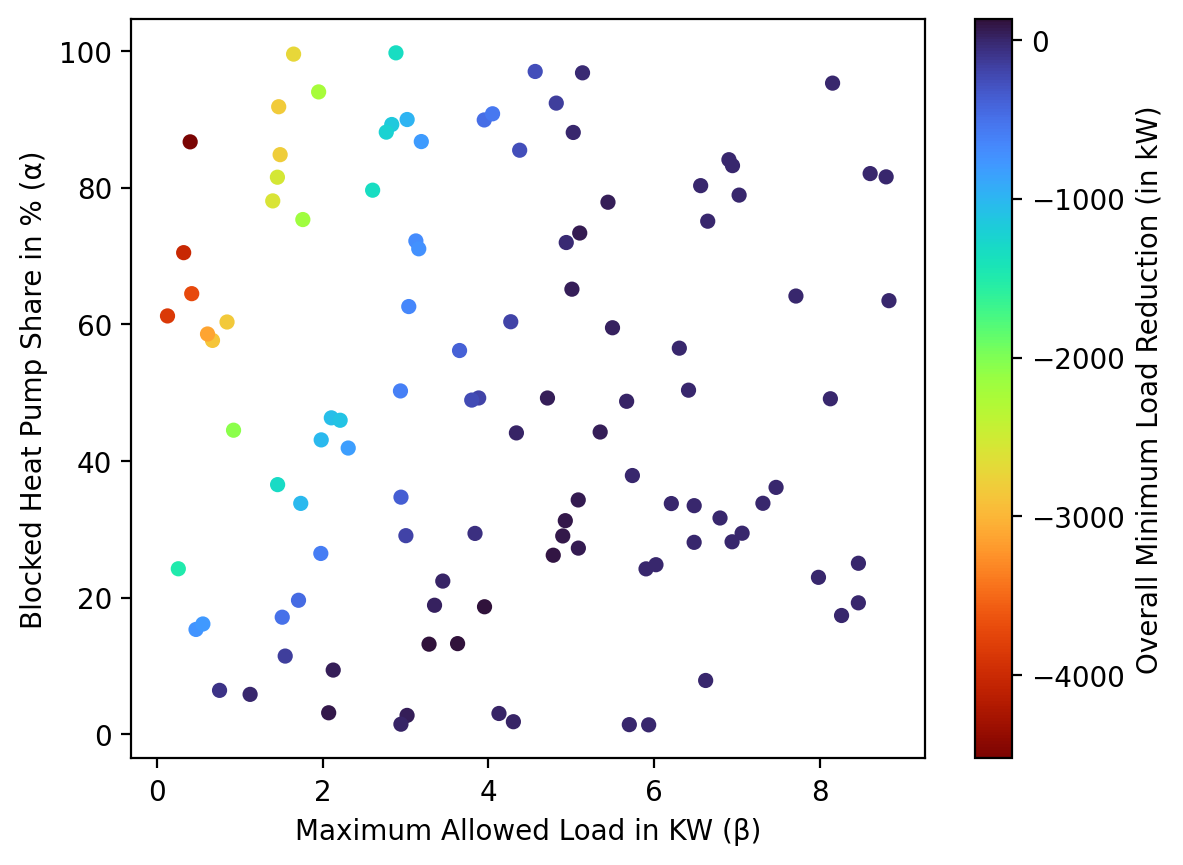

In [6]:
df.plot(
    c=overall_min,
    y=share,
    x=shift_ratio,
    kind="scatter",
    colormap="turbo_r",
)

## Plot of only positive results

<AxesSubplot: xlabel='Maximum Allowed Load in KW (β)', ylabel='Blocked Heat Pump Share in % (α)'>

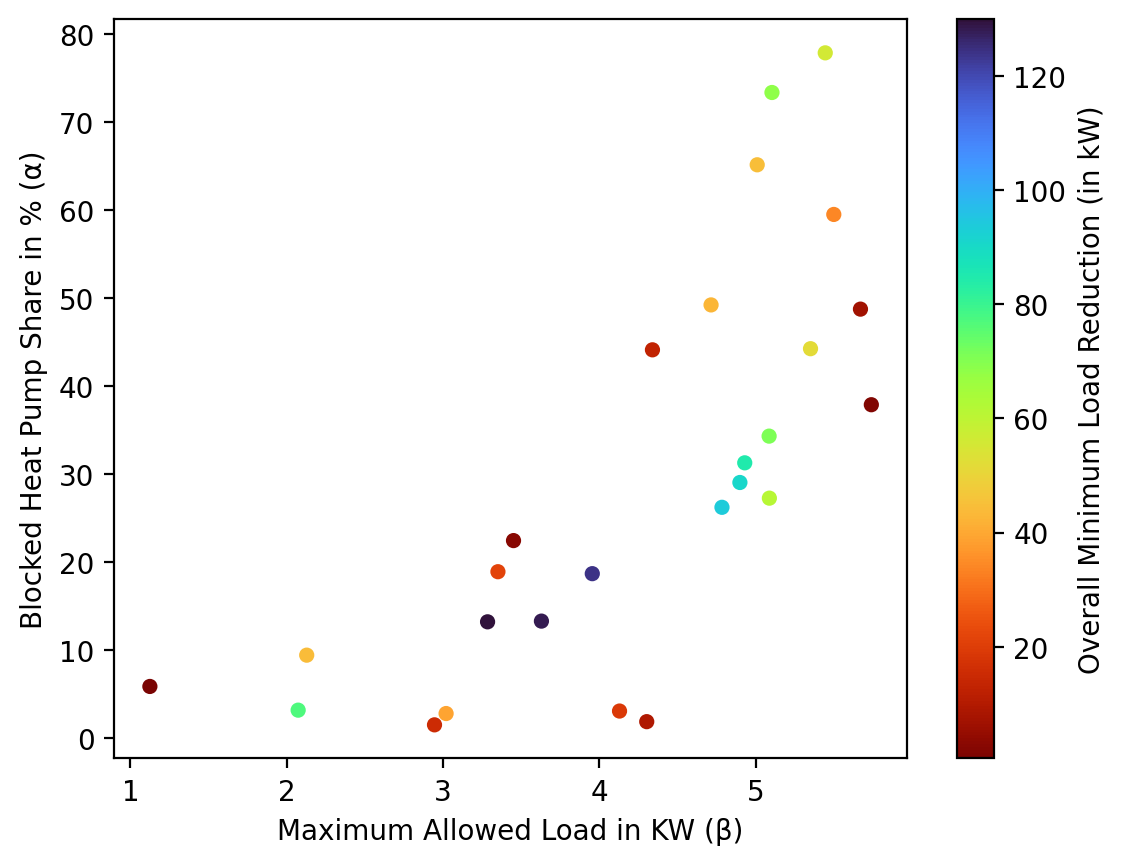

In [7]:
df[df["Overall Minimum Load Reduction (in kW)"] > 0].plot(
    c=overall_min,
    y=share,
    x=shift_ratio,
    kind="scatter",
    colormap="turbo_r",
)

## The 30 best results

In [8]:
df.head(20)

,Blocked Heat Pump Share in % (α),Maximum Allowed Load in KW (β),week0_reductions,week2_reductions,week4_reductions,MIN week0_reductions,AVG week0_reductions,MIN week2_reductions,AVG week2_reductions,MIN week4_reductions,AVG week4_reductions,Overall Minimum Load Reduction (in kW),Overall Average Load Reduction (in kW)
10,13.204168,3.284953,"[202299.03407274932, 257994.0446651578, 194239...","[183970.95010340214, 262893.03164023533, 22835...","[193479.17857285775, 207366.29909539036, 20042...",194239.799525,228346.666077,129916.456009,220865.380798,188732.395049,205312.963901,129.916456,205.312964
65,13.284533,3.629558,"[212069.73730363697, 172439.27101826295, 18697...","[281123.5027742665, 235430.89270428196, 229230...","[142243.92340529896, 166054.96385396458, 16562...",163815.967743,186979.144284,200420.666049,231638.448619,128088.936641,155761.380768,128.088937,155.761381
96,18.676550,3.954903,"[196395.10839321092, 209521.65616485476, 21296...","[233127.5769970212, 214171.19103751332, 124188...","[175029.9583168272, 172069.41469134204, 157766...",158672.428158,188074.828495,124188.047503,226689.469455,151899.605727,174843.157544,124.188048,174.843158
56,26.216204,4.784604,"[116819.22205458209, 113158.11843609251, 10854...","[232105.27347069792, 221999.67199101672, 23152...","[112901.15873347968, 112094.53072607145, 11072...",98284.295591,107838.409313,185391.715172,219994.555501,93954.297902,107077.085337,93.954298,107.077085
94,29.035935,4.899321,"[101751.28092102706, 98724.33871949837, 101131...","[218561.15876235813, 221771.52282655612, 22350...","[105257.50278762542, 97367.50399914943, 106437...",90533.447737,103422.170045,180272.050889,217282.939769,94921.762042,108779.468568,90.533448,103.422170
87,31.270866,4.930237,"[95518.23638548143, 105993.26730739139, 110201...","[215412.8973014839, 211381.89850392006, 240111...","[109269.28124817833, 94934.77920677885, 91145....",95518.236385,103607.138042,202354.758856,217384.032731,84461.679508,104556.392827,84.461680,103.607138
98,3.166793,2.073191,"[101809.32071833126, 115529.43980628066, 10173...","[134060.08722675964, 142655.03455643542, 14805...","[78941.97182200104, 110902.08900291286, 77614....",91371.396498,109539.288821,111434.183240,139613.372317,77010.085724,99265.130408,77.010086,99.265130
72,34.304534,5.086224,"[99455.85380275361, 86164.96422323957, 89188.8...","[208317.60017236508, 196485.4529188499, 196278...","[71002.83078640327, 75918.11604426242, 75142.0...",80699.593632,92657.728934,196278.611574,205895.382282,71002.830786,86938.254765,71.002831,86.938255
97,73.351720,5.104422,"[163593.070179414, 162344.80598031543, 165965....","[75605.24922911264, 124513.38199127652, 80342....","[154395.13202032447, 133908.88632337376, 15433...",144294.412086,159241.068705,68459.545677,141339.386511,133908.886323,153507.880778,68.459546,141.339387
1,27.256165,5.087873,"[82455.03555891849, 61394.15204405226, 67908.9...","[169783.1726889871, 175017.44097978435, 196193...","[72042.73416512087, 79380.2438160535, 64627.51...",61394.152044,71663.502383,150578.758639,178075.264169,61767.754368,71550.228173,61.394152,71.550228
